In [8]:
df<-read.csv('d:/data/energy/ENB2012_data.csv')
head(df)

X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33
0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28
0.90,563.5,318.5,122.50,7,3,0,0,21.46,25.38


In [9]:
library(dplyr)
df<-df %>% select(-Y1) #Y1 필드는 제외
dim(df) #데이터의 차원
summary(df) #기초통계량

[1] 768   9

       X1               X2              X3              X4       
 Min.   :0.6200   Min.   :514.5   Min.   :245.0   Min.   :110.2  
 1st Qu.:0.6825   1st Qu.:606.4   1st Qu.:294.0   1st Qu.:140.9  
 Median :0.7500   Median :673.8   Median :318.5   Median :183.8  
 Mean   :0.7642   Mean   :671.7   Mean   :318.5   Mean   :176.6  
 3rd Qu.:0.8300   3rd Qu.:741.1   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9800   Max.   :808.5   Max.   :416.5   Max.   :220.5  
       X5             X6             X7               X8              Y2       
 Min.   :3.50   Min.   :2.00   Min.   :0.0000   Min.   :0.000   Min.   :10.90  
 1st Qu.:3.50   1st Qu.:2.75   1st Qu.:0.1000   1st Qu.:1.750   1st Qu.:15.62  
 Median :5.25   Median :3.50   Median :0.2500   Median :3.000   Median :22.08  
 Mean   :5.25   Mean   :3.50   Mean   :0.2344   Mean   :2.812   Mean   :24.59  
 3rd Qu.:7.00   3rd Qu.:4.25   3rd Qu.:0.4000   3rd Qu.:4.000   3rd Qu.:33.13  
 Max.   :7.00   Max.   :5.00   Max.   :0.4000   Max.   :5.

In [10]:
(corrmatrix<-cor(df)) #상관계수 행렬

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
X1,1.000000e+00,-9.919015e-01,-0.2037817,-8.688234e-01,0.8277473,0.0000000,7.617400e-20,0.00000000,0.63433907
X2,-9.919015e-01,1.000000e+00,0.1955016,8.807195e-01,-0.8581477,0.0000000,4.664140e-20,0.00000000,-0.67299893
X3,-2.037817e-01,1.955016e-01,1.0000000,-2.923165e-01,0.2809757,0.0000000,0.000000e+00,0.00000000,0.42711700
X4,-8.688234e-01,8.807195e-01,-0.2923165,1.000000e+00,-0.9725122,0.0000000,-1.197187e-19,0.00000000,-0.86254660
X5,8.277473e-01,-8.581477e-01,0.2809757,-9.725122e-01,1.0000000,0.0000000,0.000000e+00,0.00000000,0.89578517
X6,0.000000e+00,0.000000e+00,0.0000000,0.000000e+00,0.0000000,1.0000000,0.000000e+00,0.00000000,0.01428960
X7,7.617400e-20,4.664140e-20,0.0000000,-1.197187e-19,0.0000000,0.0000000,1.000000e+00,0.21296422,0.20750499
X8,0.000000e+00,0.000000e+00,0.0000000,0.000000e+00,0.0000000,0.0000000,2.129642e-01,1.00000000,0.05052512
Y2,6.343391e-01,-6.729989e-01,0.4271170,-8.625466e-01,0.8957852,0.0142896,2.075050e-01,0.05052512,1.00000000


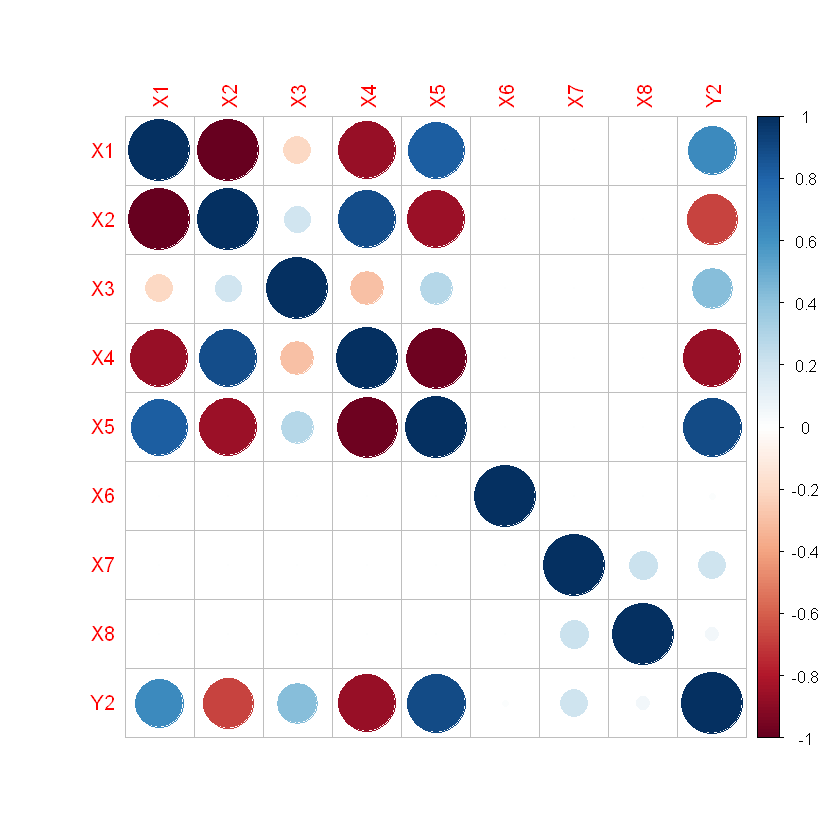

In [11]:
library(corrplot)
corrplot(cor(df), method='circle') #상관계수 플로팅

In [12]:
(model<-lm(Y2 ~ . , data=df)) #다중회귀분석 모형


Call:
lm(formula = Y2 ~ ., data = df)

Coefficients:
(Intercept)           X1           X2           X3           X4           X5  
   97.24575    -70.78771     -0.08824      0.04468           NA      4.28384  
         X6           X7           X8  
    0.12151     14.71707      0.04070  


In [13]:
summary(model) #모형 요약 #X4 샘플갯수가 적어 NA 표시됨
#Adjusted R-squared:   0.8868  88.6%
#p-value: < 2.2e-16


Call:
lm(formula = Y2 ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6940 -1.5606 -0.2668  1.3968 11.1775 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  97.245749  20.764711   4.683 3.34e-06 ***
X1          -70.787707  11.225269  -6.306 4.85e-10 ***
X2           -0.088245   0.018628  -4.737 2.59e-06 ***
X3            0.044682   0.007253   6.161 1.17e-09 ***
X4                  NA         NA      NA       NA    
X5            4.283843   0.368730  11.618  < 2e-16 ***
X6            0.121510   0.103318   1.176    0.240    
X7           14.717068   0.888018  16.573  < 2e-16 ***
X8            0.040697   0.076277   0.534    0.594    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.201 on 760 degrees of freedom
Multiple R-squared:  0.8878,	Adjusted R-squared:  0.8868 
F-statistic: 859.1 on 7 and 760 DF,  p-value: < 2.2e-16


In [14]:
reduced<-step(model,direction='backward') #후진제거법
summary(reduced)#최종모형
#Adjusted R-squared:  0.8868 
#p-value: < 2.2e-16

Start:  AIC=1795.13
Y2 ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8


Step:  AIC=1795.13
Y2 ~ X1 + X2 + X3 + X5 + X6 + X7 + X8

       Df Sum of Sq     RSS    AIC
- X8    1      2.92  7791.1 1793.4
- X6    1     14.17  7802.4 1794.5
<none>               7788.2 1795.1
- X2    1    229.96  8018.2 1815.5
- X3    1    388.96  8177.2 1830.6
- X1    1    407.52  8195.7 1832.3
- X5    1   1383.16  9171.4 1918.7
- X7    1   2814.64 10602.8 2030.1

Step:  AIC=1793.42
Y2 ~ X1 + X2 + X3 + X5 + X6 + X7

       Df Sum of Sq     RSS    AIC
- X6    1     14.17  7805.3 1792.8
<none>               7791.1 1793.4
- X2    1    229.96  8021.1 1813.8
- X3    1    388.96  8180.1 1828.8
- X1    1    407.52  8198.6 1830.6
- X5    1   1383.16  9174.3 1916.9
- X7    1   2988.93 10780.0 2040.8

Step:  AIC=1792.81
Y2 ~ X1 + X2 + X3 + X5 + X7

       Df Sum of Sq     RSS    AIC
<none>               7805.3 1792.8
- X2    1    229.96  8035.3 1813.1
- X3    1    388.96  8194.3 1828.2
- X1    1    407.52  8212.8 1829.9
- X5


Call:
lm(formula = Y2 ~ X1 + X2 + X3 + X5 + X7, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7240 -1.6017 -0.2631  1.3417 11.3251 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  97.761848  20.756339   4.710 2.94e-06 ***
X1          -70.787707  11.222822  -6.307 4.80e-10 ***
X2           -0.088245   0.018624  -4.738 2.57e-06 ***
X3            0.044682   0.007251   6.162 1.16e-09 ***
X5            4.283843   0.368650  11.620  < 2e-16 ***
X7           14.817971   0.867458  17.082  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.2 on 762 degrees of freedom
Multiple R-squared:  0.8876,	Adjusted R-squared:  0.8868 
F-statistic:  1203 on 5 and 762 DF,  p-value: < 2.2e-16
